# Creational Patterns

The creational patterns are guidelines suggested to create objects. They provide different mechanisms to create objects in a way that code is flexible, resusable, and easy to maintain.

The five creational patterns available are:
1. Builder
2. Factory
3. Abstract Factory
4. Prototype
5. Singleton

Each of those previous patterns are unique, and can be used in different situations and conditions.

# Abstract Factory

**What is an abstract factory?**

An abstract factory is factory of factories. In simple words, it is a class that allows creating several type of objects of the same family. Instead of creating each object isolated, it allows to created a bunch of them without taking care of their class in simple lines of code.

**Analogy**

If you want to create couches, you might need different object to ensemble one. Thus, you will need a factory to create all the components needed for the desired couch. 

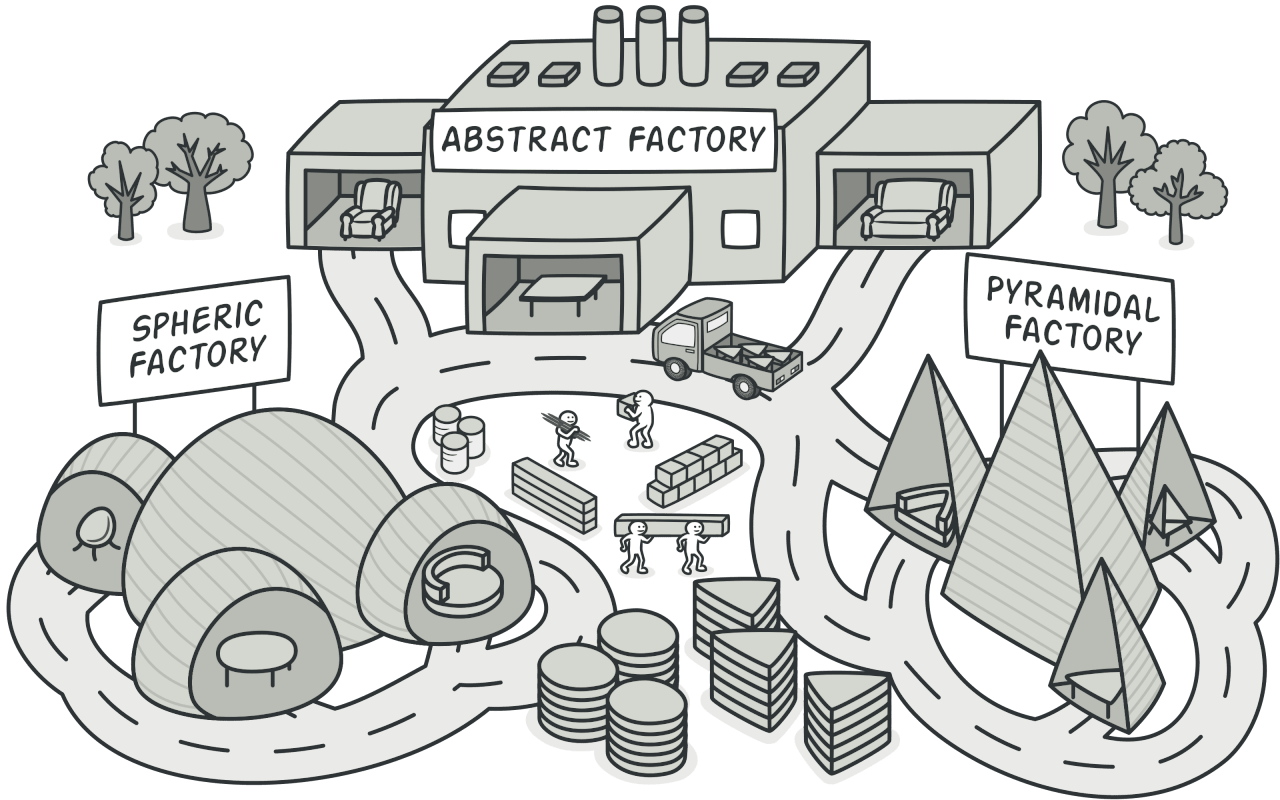

Reference: https://refactoring.guru/design-patterns/abstract-factory

**When should we use it?**

You should use it when you want to wrangle different object creations in a single class. This class will simplify everything about the different object options to create. 

**Scenario**

You want to apply different data transformations over a dataset. Those process are going to applied several times over different dataframes. This process is going to involve the following options:

1. Filtering null values from the dataset

2. Filling null values with zeros

3. Dropping an specific column

Again as we saw in the previous tutorials, we are going to use a toy dataset about diabetes from sklearn.

In [1]:
from sklearn.datasets import load_diabetes

import pandas as pd

In [2]:
df = load_diabetes(as_frame=True, return_X_y=True)

In [3]:
df = pd.concat([df[0], df[1]], axis=1)

## Antipattern

How it would be doing in a common ML/DS environment? Well, we will do this step by step.

1. Filtering null values

In [4]:
data_without_nulls = df.dropna()

2. Filling null values with zeros

In [5]:
data_filled_with_zeros = df.fillna(0)

3. Dropping the column sex

In [7]:
data_without_sex = df.drop(["sex"], axis=1)

As you saw before, everytime we want to apply those transformations, we will need to perform the same actions. To avoid the DRY, we can create an abstract factory that handles all for us.

## Pattern

In [14]:
class DataProcessingFactory:
    @staticmethod
    def droping_nulls(df):
        return df.dropna()

    @staticmethod
    def filling_nulls(df):
        return df.fillna(0)

    @staticmethod
    def droping_col(df, column):
        return df.drop([column], axis=1)

Let's going to apply the factory

1. Remove the nulls

In [15]:
data_without_nulls = DataProcessingFactory.droping_nulls(df)

2. Fill the nulls with zeros

In [17]:
data_filled_with_zeros = DataProcessingFactory.filling_nulls(df)

3. Dropping an specific column

In [18]:
data_without_sex = DataProcessingFactory.droping_col(df, "sex")

As you saw, in the factory we can create the object with different conditions as many times as you want. Here, it was given for a context of data processing. However, this can be also applied in a context of creating objects from a class.